<a href="https://colab.research.google.com/github/Ridwan1821/TeamGM2/blob/nnaemeka/movie_recommender_system_nna_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Kaggle to Google Collab

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
# download data from kaggle into collab
#! kaggle competitions download -c 'EDSA-Movie-Recommendation-Predict'

In [ ]:
# make directory named movies and unzip the downloaded file into it
#! mkdir movies
#! unzip EDSA-Movie-Recommendation-Predict.zip -d movies

**1.** **Introduction**

![](https://miro.medium.com/max/1400/0*NqJrlluUhlcZvGTx)

The [recommender system](https://en.wikipedia.org/wiki/Recommender_system) is a data science algorithm we employ to suggest items to users of a platform based on their product preferences or personal lifestyle. Recommender systems are particularly useful when an individual needs to choose an item from a potentially overwhelming number of items that a service may offer.

From Facebook, Amazon, DataQuest down to every e-commerce website, recommender systems are used to suggest a new friend, what product a customer might like or another course a student should sign up for.

**1.2** **Problem Statement**

In this challenge, we want to build a Collaborative Filtering model that will effectively recommend best movies to a customer based on their personal preferences.

**1.3 The Dataset**

For this challenge, we have been provided with a pack of dateset with millions of movie data. 

# **2.** **Libraries and Dataset**



**2.1 Import required libraries**

We import inbuilt python libraries to help us with the task.

In [ ]:
#import data manipulation libraries
import pandas as pd
import numpy as np
import scipy as sp

#import data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning tools
from sklearn.preprocessing import StandardScaler


# **2.2 Load Datasets**

**2.2.1 genome scores data**

In [ ]:
# Load genome scores data
gs = pd.read_csv('movies/genome_scores.csv')

#check number of rows and columns availbale
print('Rows -', gs.shape[0], '\nColumns -', gs.shape[1], '\n')

gs.head()

**2.2.2 genome tags data**

In [ ]:
gt = pd.read_csv('movies/genome_tags.csv')

#check number of rows and columns availbale
print('Rows -', gt.shape[0], '\nColumns -', gt.shape[1], '\n')

gt.head()

**2.2.3 IMDB data**

In [ ]:
imd = pd.read_csv('movies/imdb_data.csv')
#check number of rows and columns availbale
print('Rows -', imd.shape[0], '\nColumns -', imd.shape[1], '\n')

imd.head()

In [ ]:
# check count of observations and presence of missing values
imd.info()

The `imd.info()` check above reveals the `imd` data has missing values in the `title_cast`, `director`, `runtime`, `budeget` and `plot_keywords` columns.

**2.2.4 links dataset**

In [ ]:
# load links dataset
ld = pd.read_csv('movies/links.csv')
ld.head()

**2.2.5 movies meta dataset**

In [ ]:
# load movies dataset
mv = pd.read_csv('movies/movies.csv')
mv.head()

In [ ]:
mv.shape

**2.2.6 sample submission file**

Let's a sample file for making the challenge submission.

In [ ]:
ss = pd.read_csv('movies/sample_submission.csv')
ss.head()

**2.2.7 tags data**

In [ ]:
#load the tags dataset
tg = pd.read_csv('movies/tags.csv')
tg.head()

In [ ]:
# check for missing values in the data
tg.info()

Only the `tag` column has missing data - very insignificant count at first glance.

In [ ]:
# missing values < 0.01%
((len(tg) - tg.tag.count())/len(tg)) * 100

**2.2.8 test data**

In [ ]:
#load test data
ts = pd.read_csv('movies/test.csv')
ts.head()

In [ ]:
# create a column of userId and movieId
#ts['user_movie'] = ts.apply(lambda x: '%s_%s' %(x['userId'], x['movieId']), axis = 1)


**2.2.9 train data**

In [ ]:
tr = pd.read_csv('movies/train.csv')
tr.head()

# **3. Exploratory Data Analysis**

**3.1.1 genome scores data**

In [ ]:
# check data details
gs.info()

In [ ]:
# percentage missing values
gs.isnull().mean()

In [ ]:
# summary statistics of data
gs.describe().T

**3.1.2 genome tags**


In [ ]:
gt.info()

genome tags data has no missing values.

In [ ]:
# summary statistics
gt.describe().T

**3.1.3 imbd data**

In [ ]:
# check data details
imd.info()

In [ ]:
# evaluate percentage missing values
imd.isnull().mean()*100

We found lots of columns with missing values in the IMBD data; we will drop columns with missing entries in `title`, `director`, `plot keywords`.
Below, over 36% of entries are missing in the `title` and `director` columns, we will drop such observations.

In [ ]:
# summary statistics
imd.describe().T

In [ ]:
# drop missing data in title, director columns
imd = imd.dropna(subset=['title_cast', 'director', 'plot_keywords']) 

In [ ]:
# input missing values with average runtime for the director
imd['runtime'].fillna(imd.groupby('director')['runtime'].mean()[0], inplace=True)

The `budget` feature is redundant for this exercise; hence it will be dropped.

In [ ]:
# drop the budget column
imd = imd.drop('budget', axis = 1)

In [ ]:
# confirm data information
imd.info()

In [ ]:
imd.head(2)

In [ ]:


def clean_char(data):
    data = data.replace(' ', '_')
    data = data.replace('|', ' ')
    return data

# clean title cast column
imd['title_cast'] = imd['title_cast'].apply(clean_char)
imd.head(2)

In [ ]:
# clean title cast column
imd['director'] = imd['director'].apply(clean_char)
imd.head(2)

In [ ]:
# clean key words
def clean_char2(data):
    data = data.replace('|', ' ')
    return data

imd['plot_keywords'] = imd['plot_keywords'].apply(clean_char2)
imd.head()

**3.1.4 movie meta dataset**

In [ ]:
mv.head()

In [ ]:






# check data information
mv.info()

In [ ]:
# clean genres column
mv['genres'] = mv['genres'].apply(clean_char2)
mv.head(2)

None of the columns in the `movies` meta dataset has missing values.

**3.1.5 links data**

In [ ]:
# check for missing data
ld.info()

**3.1.6 train data**

In [ ]:
tr.info()

In [ ]:
# percentage null values
tr.isnull().mean()

There are no null values in the `train` data.

**3.1.7 test data**

In [ ]:
ts.info()

In [ ]:
# percentage missing values
ts.isnull().mean()

**3.2 Joining related datasets - IMBD and movies**

**3.2.1 Merge IMBD with movies meta data to IMBD movies**

In [ ]:
# recall imbd movies
print('Rows -', imd.shape[0], '\nColumns -', imd.shape[1], '\n')
imd.head(2)

In [ ]:
# recall movies meta data
print('Rows -', mv.shape[0], '\nColumns -', mv.shape[1], '\n')
mv.head(2)

In [ ]:
# inner join IMBD and movies data
mv_imd = imd.merge(mv, on = 'movieId')

#check number of rows and columns availbale
print('Rows -', mv_imd.shape[0], '\nColumns -', mv_imd.shape[1], '\n')

mv_imd.head(2)

**3.2.2 Adding tags and genome data**

In [ ]:
# check tags
print('Rows -', tg.shape[0], '\nColumns -', tg.shape[1], '\n')
tg.head(2)

In [ ]:
# Check genome
print('Rows -', mv.shape[0], '\nColumns -', mv.shape[1], '\n')
gs.head(2)

In [ ]:
mv_imd_tag = mv_imd.merge(tg, on = 'movieId', how = 'inner')

print('Number of tag -', mv_imd_tag.shape[0])
print('\n')
display(mv_imd_tag.isnull().sum())


In [ ]:
gs.shape

**3.3 Exploring the merger data**

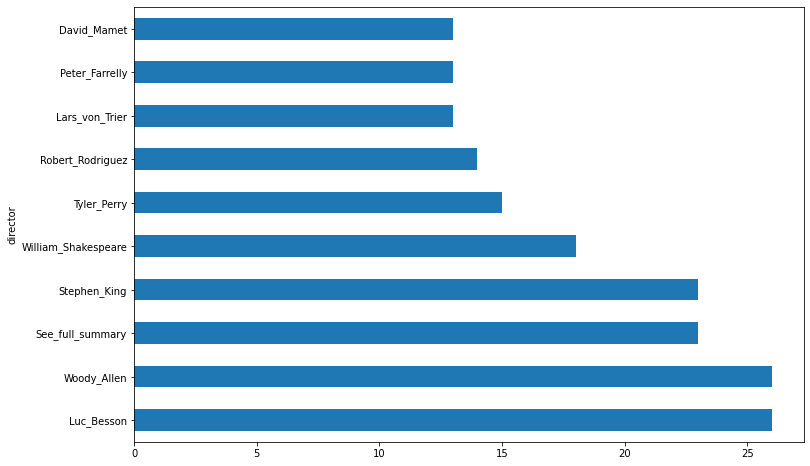

In [ ]:
plt.figure(figsize=(12, 8))
(mv_imd.groupby('director')['movieId'].count()
 .sort_values(ascending=False).nlargest(10).plot.barh())
plt.show()